In [1]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
PROJECT_FOLDER =  'drive/My Drive/airbus-ship-detection'

In [3]:
image_names = np.array(os.listdir(PROJECT_FOLDER + '/train_v2'))

In [4]:
image_names.shape

(89142,)

In [5]:
image_names[:5]

array(['75cb300db.jpg', '75ba336d9.jpg', '75cbee200.jpg', '75b529473.jpg',
       '75bfcf085.jpg'], dtype='<U13')

In [6]:
df = pd.read_csv(PROJECT_FOLDER + '/train_ship_segmentations_v2.csv')

In [7]:
df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [8]:
df.shape

(231723, 2)

In [9]:
images_df = df[df['ImageId'].isin(image_names)]

In [10]:
images_df.shape

(107518, 2)

In [11]:
images_df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [12]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107518 entries, 0 to 107603
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ImageId        107518 non-null  object
 1   EncodedPixels  38107 non-null   object
dtypes: object(2)
memory usage: 2.5+ MB


In [13]:
images_df = images_df.where(pd.notnull(images_df), None)

In [14]:
images_df.head()

,ImageId,EncodedPixels
0,00003e153.jpg,None
1,0001124c7.jpg,None
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [15]:
images_df['ImageId'].value_counts()

2531669aa.jpg    15
02776139a.jpg    15
4a3f658fc.jpg    15
6c06acaa5.jpg    15
4fde25a38.jpg    15
                 ..
2f68ce8ca.jpg     1
263bb3de9.jpg     1
22c2116f1.jpg     1
6162a2ab1.jpg     1
4c3934f88.jpg     1
Name: ImageId, Length: 89142, dtype: int64

In [16]:
image_id = '4fde25a38.jpg'

In [17]:
images_df[images_df['ImageId'] == image_id]

,ImageId,EncodedPixels
72091,4fde25a38.jpg,218694 2 219462 4 220229 7 220997 9 221764 12 ...
72092,4fde25a38.jpg,313911 11 314679 11 315447 11 316215 11 316983...
72093,4fde25a38.jpg,397614 4 398374 12 399138 16 399906 16 400674 ...
72094,4fde25a38.jpg,561688 1 562454 4 563220 6 563987 8 564753 11 ...
72095,4fde25a38.jpg,119651 6 120414 11 121182 11 121950 11 122718 ...
72096,4fde25a38.jpg,154960 2 155728 5 156496 7 157263 8 158031 7 1...
72097,4fde25a38.jpg,68212 2 68978 4 69744 7 70512 7 71281 6 72049 ...
72098,4fde25a38.jpg,128858 11 129626 11 130394 11 131162 11 131930...
72099,4fde25a38.jpg,134237 1 135004 4 135772 6 136539 8 137306 11 ...
72100,4fde25a38.jpg,168787 1 169554 4 170322 6 171089 9 171857 11 ...


In [18]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

In [19]:
img = imread(PROJECT_FOLDER + '/train_v2/' + image_id)
img_masks = images_df.loc[images_df['ImageId'] == image_id, 'EncodedPixels'].tolist()

In [20]:
img.shape

(768, 768, 3)

In [21]:
img_dims = (768, 768)

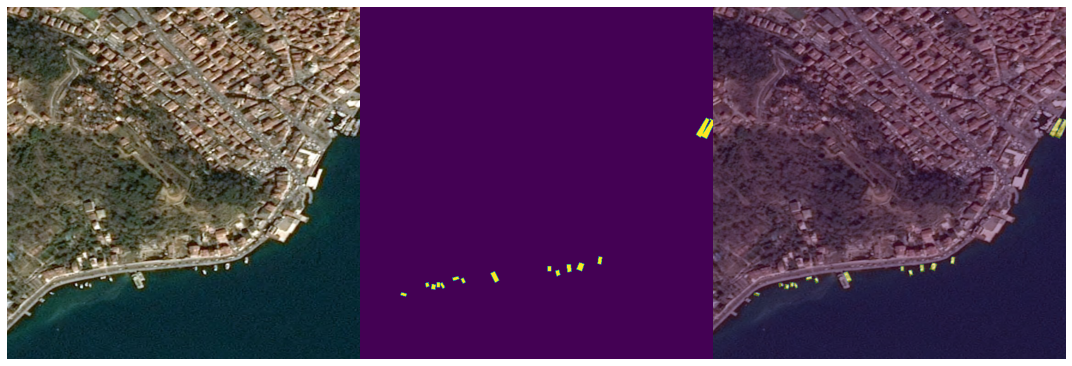

In [22]:
image_id = '4fde25a38.jpg'

img = imread(PROJECT_FOLDER + '/train_v2/' + image_id)
img_masks = images_df.loc[images_df['ImageId'] == image_id, 'EncodedPixels'].tolist()

all_masks = np.zeros(img_dims)
if img_masks and not None in img_masks:
  for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

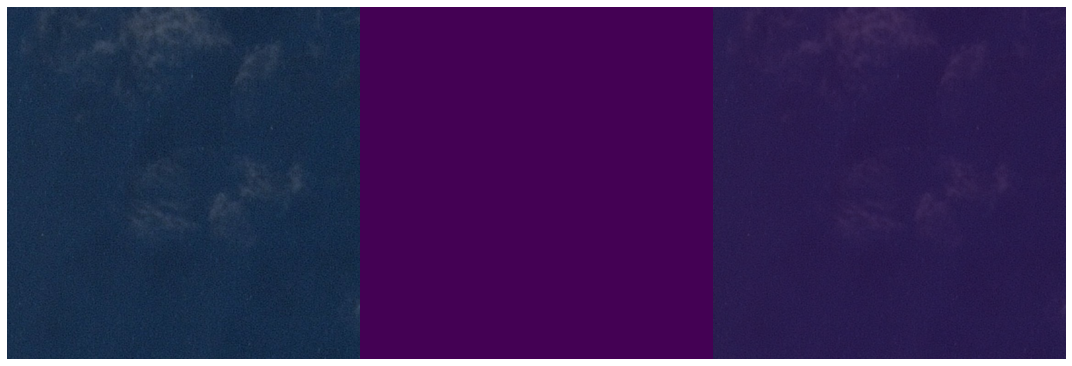

In [23]:
image_id = '00003e153.jpg'

img = imread(PROJECT_FOLDER + '/train_v2/' + image_id)
img_masks = images_df.loc[images_df['ImageId'] == image_id, 'EncodedPixels'].tolist()

all_masks = np.zeros(img_dims)
if img_masks and not None in img_masks:
  for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 40))
axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')
axarr[0].imshow(img)
axarr[1].imshow(all_masks)
axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.4)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()